## Group Assignment 

 $\underline{Problem Statement}$ : Given the Independent variables, we have to predicts the claim status and provide recommendations to Insurance firm management.

Attribute Information:
1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)

### CART Model

### Importing required packages and dataset

In [1098]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")

In [1099]:
import os
os.getcwd()

'C:\\Users\\niranja.dhavan\\Desktop\\Data Mining\\Group Assigment'

In [1100]:
df = pd.read_csv("insurance_part2_data.csv")

### Checking the data

In [1101]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [1102]:
df.tail(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2990,51,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2992,28,CWT,Travel Agency,No,11.88,Online,389,19.80,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.00,Online,234,10.00,Cancellation Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [1103]:
df.shape

(3000, 10)

In [1104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


### EDA

### Summary of the data

In [1105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


- Duration has negative value, it is not possible. Wrong entry.
- Commision & Sales- mean and median varies signficantly

Geting unique counts of all Nominal Variables

In [1106]:
for column in df[['Agency_Code', 'Type','Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




In [1107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [1108]:
print('The number of rows (observations) is:',df.shape[0],'\n''The number of columns(variables) is:',df.shape[1])

The number of rows (observations) is: 3000 
The number of columns(variables) is: 10


In [1109]:
df.size

30000

In [1110]:
df.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

There are many object type variables (Agency_Code, Type, Claimed, Channel, Product Name , Destination) which has the object data types.


In [1111]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [1112]:
df['Age'].unique()

array([48, 36, 39, 33, 45, 61, 37, 43, 52, 31, 23, 29, 28, 27, 44, 46, 25,
       60, 30, 40, 32, 26, 38, 42, 51, 24, 59, 41, 56, 35, 58, 73, 47, 50,
       22, 20, 53, 68, 34, 79, 19, 21, 66, 69, 57, 63, 54, 64, 71, 49, 62,
       84, 17, 55, 76, 72, 65, 67, 75, 70, 18, 77, 14, 81, 74,  8, 16, 83,
       15, 11], dtype=int64)

In [1113]:
df['Commision'].unique()

array([7.0000e-01, 0.0000e+00, 5.9400e+00, 6.3000e+00, 1.5750e+01,
       3.5640e+01, 4.6960e+01, 1.5880e+01, 5.8800e+00, 2.3760e+01,
       5.4000e+01, 5.9400e+01, 1.8200e+01, 1.7250e+01, 6.2500e+00,
       1.4000e+01, 2.5550e+01, 7.7000e+00, 1.5000e+01, 2.0380e+01,
       9.7500e+00, 1.6250e+01, 7.3800e+00, 3.1500e+00, 4.0250e+01,
       1.1550e+01, 8.3800e+00, 6.3210e+01, 4.1580e+01, 7.6400e+00,
       1.0500e+01, 2.3500e+01, 4.8300e+01, 2.2130e+01, 4.8000e+00,
       6.7500e+00, 1.1750e+01, 5.2330e+01, 5.2500e+00, 9.1000e+00,
       8.8800e+00, 8.3250e+01, 3.8000e-01, 2.6630e+01, 7.7000e-01,
       6.0000e+00, 5.3460e+01, 1.2250e+01, 1.7550e+01, 2.0000e+01,
       1.7820e+01, 7.7220e+01, 1.1880e+01, 1.2950e+01, 1.4937e+02,
       2.9700e+01, 2.7300e+01, 2.8500e+01, 4.5000e+00, 5.8500e+00,
       4.1420e+01, 2.0130e+01, 4.9730e+01, 4.2500e+00, 4.8420e+01,
       5.3800e+00, 1.3630e+01, 2.2000e+01, 1.0692e+02, 8.3160e+01,
       4.7520e+01, 6.9710e+01, 6.4800e+01, 3.6400e+01, 5.0000e

In [1114]:
df['Channel'].unique()

array(['Online', 'Offline'], dtype=object)

In [1115]:
df['Duration'].unique()

array([   7,   34,    3,    4,   53,    8,   30,   16,   19,   42,  368,
         77,   23,   21,  366,    2,   40,   33,   66,   71,   25,   29,
         31,   36,   70,   11,   27,   32,   20,   90,   17,   14,    5,
         75,   35,   24,   22,  364,   13,   15,    6,   37,  365,   38,
         81,   96,   28,   44,   57,   51,   26,  367,   12,    9,  110,
         58,   65,  100,  186,   39,   48,   46,  266,   72,   61,   43,
         18,  146,   10,   59,   93,   56,   50,   99,  135,  382,   47,
         74,   64,  379,  152,  112,  380,  189,   60,   41,   89,   95,
        383,   62,  374,   55,  401,  145,   80,   83,    1,   52,  114,
         63,   49,   69,   67,  109,  105,   54,   98,  259,  239,  102,
        166,  165,  107,  385,   68,   73,  144,  126,  116,   45,  113,
        111,  378,   82,  187,  394,  147,   88,  175,   87,  402,  393,
        224,  384,  244,  148,  209,  132,  377,  235,   79,  101,  158,
        120,  376,  125,  386,  162,  375,   76,  1

In [1116]:
df['Sales'].unique()

array([2.5100e+00, 2.0000e+01, 9.9000e+00, 2.6000e+01, 1.8000e+01,
       4.5000e+01, 5.9400e+01, 8.0000e+01, 1.4000e+01, 4.3000e+01,
       1.8785e+02, 6.3500e+01, 1.1000e+02, 2.3500e+01, 3.9600e+01,
       2.1600e+02, 4.2000e+01, 9.9000e+01, 5.2000e+01, 3.2000e+01,
       6.2000e+01, 6.9000e+01, 2.5000e+01, 5.1000e+01, 4.0000e+01,
       3.0000e+01, 2.7000e+01, 5.0000e+01, 2.2000e+01, 6.0000e+01,
       8.1500e+01, 3.7000e+01, 3.9000e+01, 5.6000e+01, 2.8000e+01,
       2.9500e+01, 1.1240e+01, 2.4000e+01, 1.6100e+02, 3.3000e+01,
       1.7000e+01, 3.3500e+01, 2.5285e+02, 1.0000e+01, 2.3000e+01,
       6.9300e+01, 3.0550e+01, 1.9000e+01, 1.1200e+02, 9.5000e+01,
       9.4000e+01, 1.9320e+02, 8.8500e+01, 1.9200e+01, 1.1000e+01,
       7.5000e+01, 4.7000e+01, 2.0930e+02, 2.1000e+01, 1.5000e+02,
       3.5500e+01, 3.3300e+02, 1.3500e+00, 1.0650e+02, 2.7600e+00,
       2.9000e+01, 1.5000e+01, 8.9100e+01, 3.5000e+01, 3.8000e+01,
       2.9700e+01, 1.2000e+01, 1.2870e+02, 1.9800e+01, 0.0000e

### Check for duplicate data

In [1117]:
duplicate = df[df.duplicated()] 
duplicate

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


Though it shows there are 139 records, considering the fact that it can be of different customers. We are not droping the same.

In [1118]:
duplicate.shape

(139, 10)

### Proportion of observations in each of the target classes

In [1119]:
df['Claimed'].value_counts()

No     2076
Yes     924
Name: Claimed, dtype: int64

In [1120]:
mapper = {'No': 0 , 'Yes': 1}
df['Claimed'] = df['Claimed'].map(mapper)
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,0,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,0,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,0,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,0,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,0,6.30,Online,53,18.00,Bronze Plan,ASIA


In [1121]:
# Get the proportion in each class
df['Claimed'].value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

It was identified that Target variable is not balanced data. As we can see that No Constitutes of 69% & Yes Constitutes of 30% of total Entries.

### Check for missing value in any column

In [1122]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are no missing values in the dataset and we can go ahead with building the model.

In [1123]:
# Getting the number of missing values in each column
num_missing = df.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / df.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage


Basis above plot it clear that there are many outliers in the variables.

C:\Users\niranja.dhavan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\niranja.dhavan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\niranja.dhavan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\niranja.dhavan\Anaconda3\lib\

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A94237AD88>,
      dtype=object)

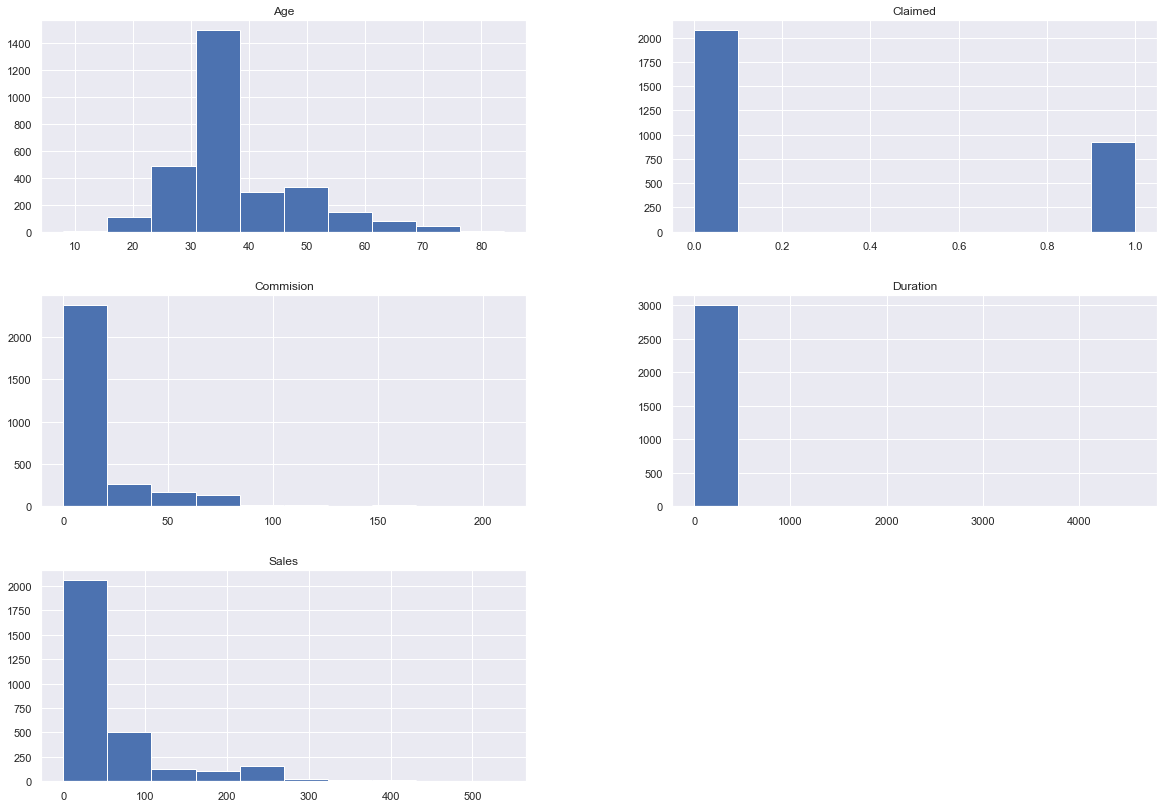

In [1137]:
rcParams['figure.figsize']=20,14

df.hist()

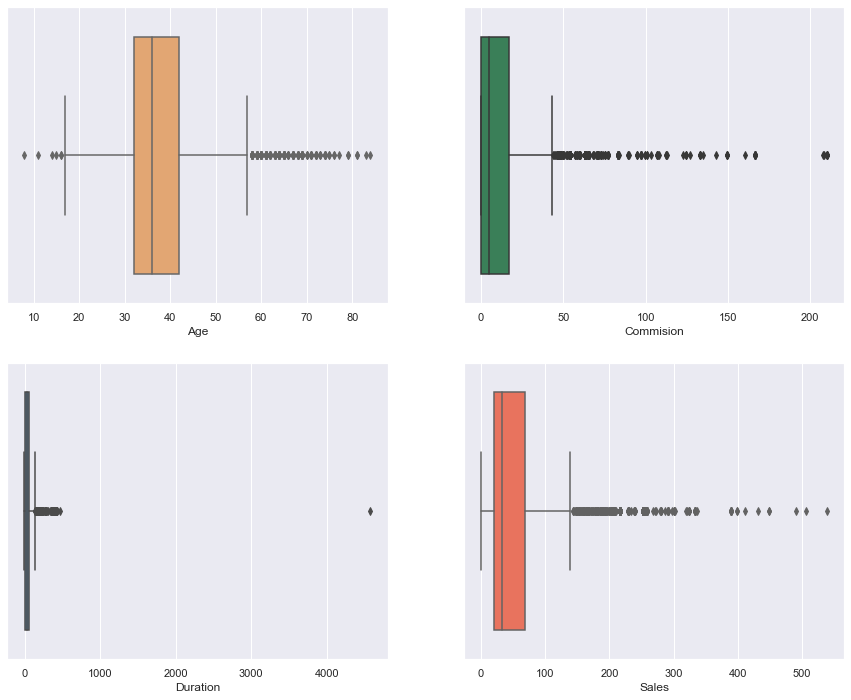

In [1141]:
fig , axes = plt.subplots(nrows=2,ncols=2, figsize=(15,12))
sns.boxplot(df['Age'],ax=axes[0,0],color='sandybrown')
sns.boxplot(df['Commision'],ax=axes[0,1],color='seagreen')
sns.boxplot(df['Duration'],ax=axes[1,0],color='steelblue')
sns.boxplot(df['Sales'],ax=axes[1,1],color='tomato')
plt.show()

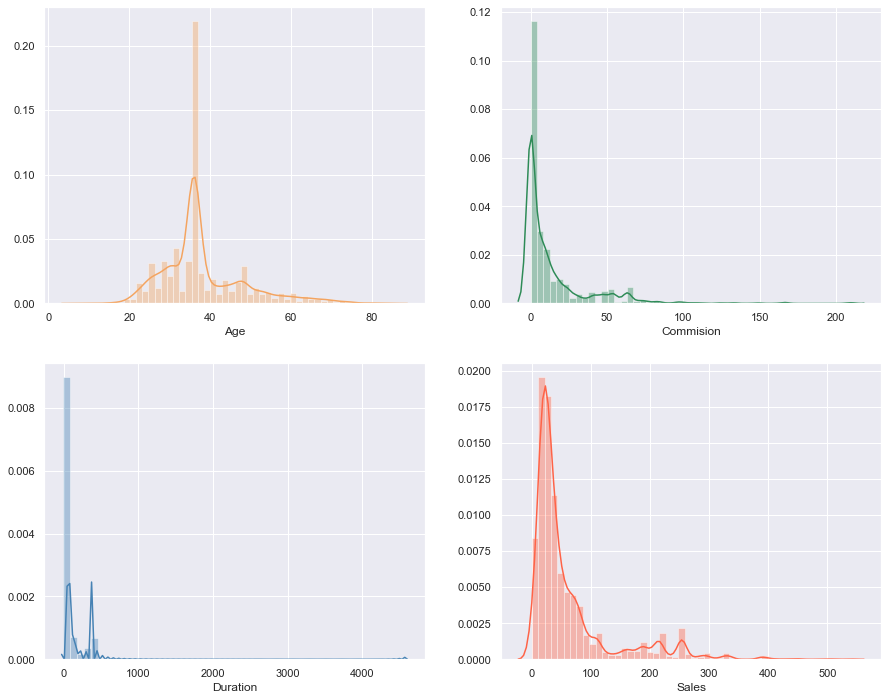

In [1142]:
ig , axes = plt.subplots(nrows=2,ncols=2, figsize=(15,12))
sns.histplot(df['Age'],ax=axes[0,0],color='sandybrown')
sns.histplot(df['Commision'],ax=axes[0,1],color='seagreen')
sns.histplot(df['Duration'],ax=axes[1,0],color='steelblue')
sns.distplot(df['Sales'],ax=axes[1,1],color='tomato')
plt.show()


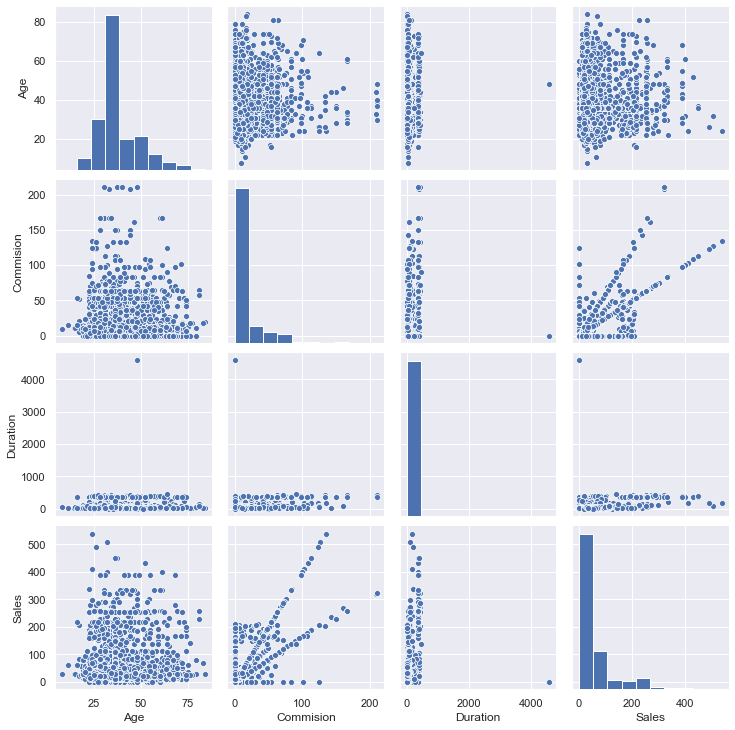

In [1136]:
sns.pairplot(df[['Age', 'Commision', 'Duration', 'Sales']])

## sklearn in Python does not take the input of object data types when building Classification Trees. So, we need to convert these variables into some numerical form.We shall perform onehot encoding for them all

In [958]:
# Let us define the X(All independent variables) and Y(Dependent ~ "Claimed") variables

X = df.drop("Claimed" , axis=1)

Y = df.pop("Claimed")
#we have made a copy of the data frame as the 'pop' function removes that particular variable from the data frame and stores 
# in another variable

In [959]:
# Encoding Categorical Features
X = pd.get_dummies( X, drop_first = False )

In [960]:
list(X.columns)

['Age',
 'Commision',
 'Duration',
 'Sales',
 'Agency_Code_C2B',
 'Agency_Code_CWT',
 'Agency_Code_EPX',
 'Agency_Code_JZI',
 'Type_Airlines',
 'Type_Travel Agency',
 'Channel_Offline',
 'Channel_Online',
 'Product Name_Bronze Plan',
 'Product Name_Cancellation Plan',
 'Product Name_Customised Plan',
 'Product Name_Gold Plan',
 'Product Name_Silver Plan',
 'Destination_ASIA',
 'Destination_Americas',
 'Destination_EUROPE']

In [961]:
X.dtypes

Age                                 int64
Commision                         float64
Duration                            int64
Sales                             float64
Agency_Code_C2B                     uint8
Agency_Code_CWT                     uint8
Agency_Code_EPX                     uint8
Agency_Code_JZI                     uint8
Type_Airlines                       uint8
Type_Travel Agency                  uint8
Channel_Offline                     uint8
Channel_Online                      uint8
Product Name_Bronze Plan            uint8
Product Name_Cancellation Plan      uint8
Product Name_Customised Plan        uint8
Product Name_Gold Plan              uint8
Product Name_Silver Plan            uint8
Destination_ASIA                    uint8
Destination_Americas                uint8
Destination_EUROPE                  uint8
dtype: object

We Can see that all Object data types are coverted into Into Numerical form (i.e. uint8)

In [962]:
X.head()

,Age,Commision,Duration,Sales,Agency_Code_C2B,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Airlines,Type_Travel Agency,Channel_Offline,Channel_Online,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_ASIA,Destination_Americas,Destination_EUROPE
0,48,0.70,7,2.51,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,36,0.00,34,20.00,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,39,5.94,3,9.90,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
3,36,0.00,4,26.00,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0
4,33,6.30,53,18.00,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0


We see that the data types of all the variables have been changed to either of  𝑖𝑛𝑡64 or 𝑢𝑖𝑛𝑡8 or 𝑓𝑙𝑜𝑎𝑡64.

### Split the data into Train and Test.

Before building the model we should split the data into Train and Test. We will thus build a model on the training data and use this model to predict on the test data.

We will be doing a 70:30 split. 70% of the whole data will be used to train the data and then 30% of the data will be used for testing the model thus built.

In [963]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

## Decision Tree Classifier

In [964]:
from sklearn import tree

In [965]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In the above code snippet we have defined a Decision Tree (which is to be used for classification problems) with the splitting criteria for each node as 'gini'.

Now, that we have defined a Decision Tree, let us go ahead and build the model on the training data.

In [966]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Let us check importance of the variables in the Classification Tree. The importance of a feature or variable is computed as the (normalized) total reduction of the gini criterion brought by that feature. It is also known as the Gini importance.

In [967]:
pd.Series(dt_model.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Duration                          0.254863
Sales                             0.194513
Agency_Code_C2B                   0.188265
Age                               0.170710
Commision                         0.096285
Product Name_Cancellation Plan    0.015495
Product Name_Customised Plan      0.012677
Product Name_Silver Plan          0.011399
Product Name_Bronze Plan          0.010276
Product Name_Gold Plan            0.009926
Destination_Americas              0.007818
Channel_Offline                   0.007465
Destination_EUROPE                0.006234
Destination_ASIA                  0.004914
Agency_Code_CWT                   0.003748
Type_Travel Agency                0.002088
Type_Airlines                     0.001915
Agency_Code_EPX                   0.001408
Agency_Code_JZI                   0.000000
Channel_Online                    0.000000
dtype: float64

From the above output, we can see that 'Duration' is the most important variable followed by 'Sales' and so on.

Let us take a look at the overall accuracy of the train and test data using the model that we just built.

In [968]:
#Train Data
dt_model.score(X_train,train_labels)

0.9947619047619047

In [969]:
#Test Data
dt_model.score(X_test,test_labels)

0.7022222222222222

The accuracy on the Training Data is 99% and the accuracy on the Test Data is 70% which is lesser substantially. The model has surely been overfitted. 
Thus, we need to prune or regularize the tree.

### Pruning/Regularizing the Tree

## Using Grid Search CV

GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best parameters from the listed hyperparameters

What the command GridSearchCV does is build multiple model based on a range of parameters specified by us. Then it ultimately returns best parameters on the basis of which we can go ahead and build our model. Let us now see how to define the range of parameters for the GridSearchCV function.

In [970]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion':['entropy','gini'],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [25, 40, 41, 42, 43, 44],
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270]
}

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

Now that we have defined a dictionary in Python with all these parameters, it is time to use these parameters to build the model and check for the best set of parameters. The above dictionary makes sure that all the different combinations of values are used to build Best CART models.


In [971]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
         

In [972]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 25,
 'min_samples_split': 150}

Now we need to get the best model which uses these particular parameters.

In [973]:
best_grid = grid_search.best_estimator_

Now that we have the best model, let us go ahead and use this model to predict on the Training Data as well as on the Test Data.

In [974]:
dt_regmodel = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=10,
                                     min_samples_split=45,random_state=1)

In [975]:
dt_regmodel.fit(X_train,train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=45,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Let us now go ahead and print the classification report for the test data and compare between train and test.

In [976]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

We can also go ahead and predict the probabilities as well. This is useful when we want to fix the value of the cut-off point ourselves to specify the classes. Python takes the default cut-off point as 0.5.

In [977]:
y_train_predict_prob = best_grid.predict_proba(X_train)
y_test_predict_prob = best_grid.predict_proba(X_test)

# Model Evaluation

Let us first evaluate on the training data.

In [978]:
from sklearn.metrics import classification_report

We will start by checking the confusion matrix and then the classification report as well.

### Train Accuracy

In [979]:
cart_train_score = dt_regmodel.score(X_train,train_labels)
cart_train_score

0.7995238095238095

### Confusion_matrix for train data

In [980]:
from sklearn import metrics

In [981]:
cart_conf_train = metrics.confusion_matrix(train_labels, ytrain_predict)
cart_conf_train

array([[1311,  160],
       [ 264,  365]], dtype=int64)

True Negative: 1311 
False Positives: 160 
False Negatives: 264 
True Positives: 365


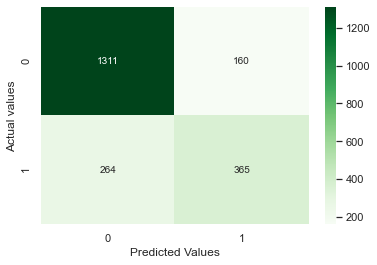

In [982]:
sns.heatmap(metrics.confusion_matrix(train_labels, ytrain_predict),annot=True,fmt='d',cmap='Greens')
tn, fp, fn, tp = metrics.confusion_matrix(train_labels,ytrain_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

In [983]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1471
           1       0.70      0.58      0.63       629

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



We can see a 80% overall accuracy on the Training data.

Now, let us check the Area Under Curve of the Receiver Operator Characteristic Curve.

AUC: 0.834


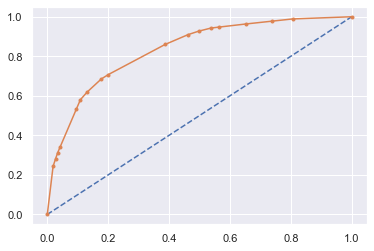

In [984]:
# calculate AUC
cart_train_auc = metrics.roc_auc_score(train_labels,y_train_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % cart_train_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = metrics.roc_curve(train_labels,y_train_predict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')
# show the plot
plt.show()

In [985]:
cart_metrics=classification_report(train_labels,ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.58
cart_train_f1  0.63


### Test Accuracy

In [986]:
cart_test_score = dt_regmodel.score(X_test,test_labels)
cart_test_score

0.7755555555555556

###  Confusion_matrix for test data

In [987]:
cart_conf_test = metrics.confusion_matrix(test_labels, ytest_predict)
cart_conf_test

array([[551,  54],
       [158, 137]], dtype=int64)

True Negative: 551 
False Positives: 54 
False Negatives: 158 
True Positives: 137 



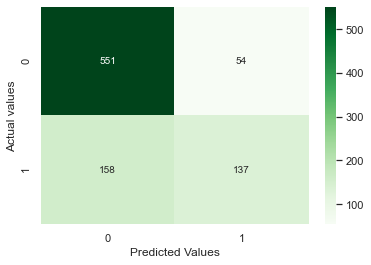

In [1008]:
tn, fp, fn, tp = metrics.confusion_matrix(test_labels,ytest_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')
sns.heatmap(metrics.confusion_matrix(test_labels, ytest_predict),annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()

In [1009]:
print(metrics.classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.46      0.56       295

    accuracy                           0.76       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



We can see a 78% overall accuracy on the Training data.

AUC: 0.796


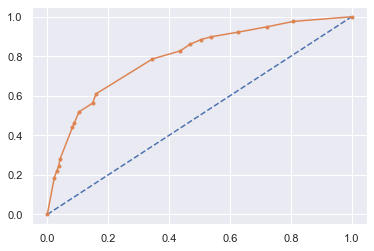

In [1010]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
cart_test_auc = metrics.roc_auc_score(test_labels,y_test_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % cart_test_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = metrics.roc_curve(test_labels,y_test_predict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
# show the plot
plt.show()

In [990]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.46
cart_test_f1  0.56


## Random Forest Classifier

We will start by building a basic Random Forest Model and then we will go ahead and tune the various parameters of the Random Forest model.

In [1037]:
from sklearn.ensemble import RandomForestClassifier

In [1038]:
rfcl = RandomForestClassifier(criterion='gini',
                              random_state=1,
                                  oob_score=True,
                              max_features=4,
                              n_estimators=501)

* In the above code snippet we have defined a Random Forest (which is to be used for classification problems) with the splitting criteria for each node as 'gini'. The 'random_state' parameter ensures that each time we run the code snippet the values remains the same. 

* In the above code snippet default values of 'min_samples_split' and 'min_samples_leaf' is taken as 2 and 1 respectively.

* We are enabling the Out of Bag score as well to get an idea about how well the model has been fitted. 

* For our basic model of Random Forest, we are only taking 4 features to be used to build each tree inside this Random Forest. 

* The number of Decision Trees to be built inside this Random Forest has been specified as 501 with the n_estimators parameter.

Now that we have defined a Random Forest model let us build the model on the training data.

In [1039]:
rfcl.fit(X_train,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

Let us check the Out Of Bag score now.

In [1040]:
(rfcl.oob_score_)

0.7542857142857143

Out Of Bag score is 0.75

In [1041]:
(1 - rfcl.oob_score_)*100

24.571428571428566

Out Of Bag error rate

Let us now check the variable importances in this particular Random Forest model

In [1042]:
pd.Series(rfcl.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Duration                          0.258659
Sales                             0.198731
Age                               0.176357
Commision                         0.125201
Agency_Code_C2B                   0.064424
Product Name_Silver Plan          0.033350
Type_Travel Agency                0.019964
Type_Airlines                     0.019250
Product Name_Customised Plan      0.017554
Agency_Code_EPX                   0.016821
Product Name_Cancellation Plan    0.013786
Agency_Code_JZI                   0.012966
Destination_ASIA                  0.007147
Product Name_Gold Plan            0.007092
Destination_Americas              0.006944
Product Name_Bronze Plan          0.006069
Destination_EUROPE                0.005212
Agency_Code_CWT                   0.004301
Channel_Online                    0.003136
Channel_Offline                   0.003034
dtype: float64

From the above output, we can see that 'Duration' is the most important variable followed by 'Sales' and so on.

Now that we have built a basic Random Forest model, let us use the same to predict in the in-sample (Training data) data and out-of-sample (Test data) data and check the accuracy.

In [1043]:
rfcl.score(X_train,train_labels)

0.9947619047619047

In [1044]:
rfcl.score(X_test,test_labels)

0.7577777777777778

We see that the accuracy on the Training data is almost 1 and the accuracy on the test data is lower and can do with a better model. This shows a case of slight overfitting. We have allowed the Decision Trees inside the Random Forest algorithm to grow to their fullest. There is scope to regularize this particular Random Forest model to achieve comparative accuracy on both the Training and Test data.

We will start by building a Random Forest Model and then we will go ahead and tune the various parameters of the Random Forest model.

In [1046]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,8,9,10],
    'max_features': [5,6,9,10],
    'n_estimators': [301, 201,351,401,451,551]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3,n_jobs=-1)
#n_jobs=-1 allows paralle processing instead of serial processing

    

* In the above code snippet we have defined a Random Forest (which is to be used for classification problems) with the splitting criteria for each node as 'gini' & Entropy. The 'random_state' parameter ensures that each time we run the code snippet the values remains the same. 

* In the above code snippet default values of 'min_samples_split' and 'min_samples_leaf' is taken as 2 and 1 respectively.

* We are enabling the Out of Bag score as well to get an idea about how well the model has been fitted. 

* For our model of Random Forest, we are only inputting 5,7,8,9,10 max_depth to be used to build each tree inside this Random Forest. 

* For our model of Random Forest, we are only inputting 5,6,9,10 features to be used to build each tree inside this Random Forest. 

* The number of Decision Trees to be built inside this Random Forest has been specified as 301, 201,351,401,451,551 with the n_estimators parameter.


Now that we have defined a Random Forest model let us build the model on the training data.

In [1047]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

Now that we have executed the GridSearchCV function, let us see the best parameters that we get.

In [1048]:
#Would like to see which combination gave us the best fit of all
grid_search.best_params_

{'max_depth': 7, 'max_features': 5, 'n_estimators': 401}

Now we need to get the best model which uses these particular parameters.

In [1049]:
best_grid_rf = grid_search.best_estimator_

Now that we have the best model, let us go ahead and use this model to predict on the Training Data as well as on the Test Data.

In [1050]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

# Model Evaluation

We will now go ahead and evaluate the Random Forest model.

Let us first evaluate on the training data.


In [1051]:
from sklearn import metrics

We will start by checking the confusion matrix and then the classification report as well.

### Train Accuracy

In [1052]:
rf_train_score = best_grid_rf.score(X_train,train_labels)
rf_train_score

0.8361904761904762

### Confusion_matrix for training data

In [1053]:
rf_conf_train =metrics.confusion_matrix(train_labels,ytrain_predict_rf)

True Negative: 1345 
False Positives: 126 
False Negatives: 218 
True Positives: 411


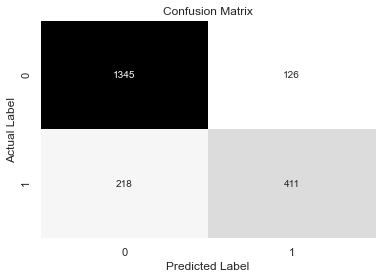

In [1054]:
tn, fp, fn, tp = metrics.confusion_matrix(train_labels,ytrain_predict_rf).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(train_labels,ytrain_predict_rf),annot=True, fmt='d', cbar=False,cmap='Greys')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [1055]:
print(metrics.classification_report(train_labels,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1471
           1       0.77      0.65      0.70       629

    accuracy                           0.84      2100
   macro avg       0.81      0.78      0.80      2100
weighted avg       0.83      0.84      0.83      2100



We can see a 84% overall accuracy on the Training data.

Now, let us check the Area Under Curve of the Receiver Operator Characteristic Curve.

AUC: 0.892


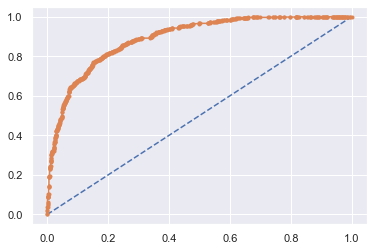

In [1056]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
rf_train_auc = metrics.roc_auc_score(train_labels,y_train_predict_prob_rf[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % rf_train_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = metrics.roc_curve(train_labels,y_train_predict_prob_rf[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.')
# show the plot
plt.show()

In [1057]:
rf_metrics=classification_report(train_labels, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)


rf_train_precision  0.77
rf_train_recall  0.65
rf_train_f1  0.7


Now, let us evaluate the predictions got on the test data using the same model evaluation metrics to understand how our model performs on the test data.

### Test Accuracy

In [1058]:
rf_test_score = best_grid_rf.score(X_test,test_labels)
rf_test_score

0.7777777777777778

### Confusion_matrix for test data

In [1059]:
rf_conf_test = metrics.confusion_matrix(test_labels,ytest_predict_rf)

True Negative: 551 
False Positives: 54 
False Negatives: 146 
True Positives: 149 



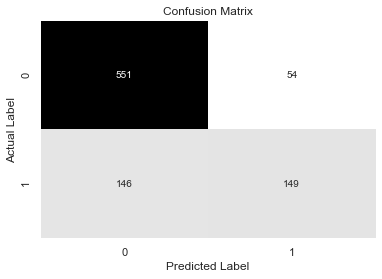

In [1060]:
tn, fp, fn, tp = metrics.confusion_matrix(test_labels,ytest_predict_rf).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')
sns.heatmap(metrics.confusion_matrix(test_labels,ytest_predict_rf),annot=True, fmt='d', cbar=False,cmap='Greys')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [1061]:
print(metrics.classification_report(test_labels,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       605
           1       0.73      0.51      0.60       295

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.72       900
weighted avg       0.77      0.78      0.77       900



We can see a 78% overall accuracy on the Testing data.

AUC: 0.820


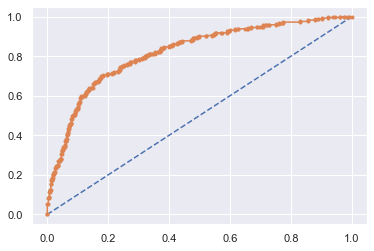

In [1062]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
rf_test_auc = metrics.roc_auc_score(test_labels,y_test_predict_prob_rf[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % rf_test_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = metrics.roc_curve(test_labels,y_test_predict_prob_rf[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.')
# show the plot
plt.show()

In [1063]:
rf_metrics=classification_report(test_labels, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.51
rf_test_f1  0.6


## MLP Classifier (Artificial Neural Network)

Before building the ANN model, we will go ahead and scale the data. Scaling the predictor variables helps in converging of the values. For computationally heavy algorithms, we can scale the data.

In [1064]:
from sklearn.preprocessing import StandardScaler 

Let us define an empty StandardScaler function before using it.

In [1065]:
sc = StandardScaler() 

First, we will scale the training data using the mean and standard deviation of the training data itself.

In [1066]:
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_train_scaled.head()

,Age,Commision,Duration,Sales,Agency_Code_C2B,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Airlines,Type_Travel Agency,Channel_Offline,Channel_Online,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_ASIA,Destination_Americas,Destination_EUROPE
0,-0.191925,-0.580954,-0.287441,-0.573066,-0.684494,-0.435662,1.111945,-0.283279,-0.805203,0.805203,-0.120386,0.120386,-0.5141,-0.536976,1.272185,-0.201579,-0.413789,0.470787,-0.346410,-0.283279
1,-0.191925,-0.580954,0.461466,-0.269106,-0.684494,-0.435662,1.111945,-0.283279,-0.805203,0.805203,-0.120386,0.120386,-0.5141,-0.536976,1.272185,-0.201579,-0.413789,-2.124102,2.886751,-0.283279
2,-0.971882,1.216146,2.027988,1.746015,1.460934,-0.435662,-0.899325,-0.283279,1.241923,-1.241923,-0.120386,0.120386,-0.5141,-0.536976,-0.786049,-0.201579,2.416690,0.470787,-0.346410,-0.283279
3,-0.971882,-0.116754,-0.294312,-0.179299,1.460934,-0.435662,-0.899325,-0.283279,1.241923,-1.241923,-0.120386,0.120386,-0.5141,-0.536976,-0.786049,-0.201579,2.416690,0.470787,-0.346410,-0.283279
4,0.978010,0.131610,-0.129415,-0.172391,-0.684494,2.295355,-0.899325,-0.283279,-0.805203,0.805203,-0.120386,0.120386,-0.5141,-0.536976,-0.786049,4.960822,-0.413789,0.470787,-0.346410,-0.283279


Now that we have fitted and transformed the Standard Scaler function on the training data, we will only transform the test using the StandardScaler function. We will use the means and standard deviations of the variables of the training data to scale the test data.

In [1067]:
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns)
X_test_scaled.head()

,Age,Commision,Duration,Sales,Agency_Code_C2B,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Airlines,Type_Travel Agency,Channel_Offline,Channel_Online,Product Name_Bronze Plan,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_ASIA,Destination_Americas,Destination_EUROPE
0,-1.499782,0.650546,-0.369411,0.264428,-0.627048,2.359946,-0.948016,-0.318734,-0.773679,0.773679,-0.134535,0.134535,1.807043,-0.548250,-0.768184,-0.175863,-0.392232,-2.200944,-0.343529,3.775478
1,1.522372,-0.267862,-0.408584,-0.463675,1.594775,-0.423739,-0.948016,-0.318734,1.292526,-1.292526,-0.134535,0.134535,1.807043,-0.548250,-0.768184,-0.175863,-0.392232,0.454350,-0.343529,-0.264867
2,-0.858719,-0.378306,-0.320445,-0.621305,1.594775,-0.423739,-0.948016,-0.318734,1.292526,-1.292526,-0.134535,0.134535,1.807043,-0.548250,-0.768184,-0.175863,-0.392232,0.454350,-0.343529,-0.264867
3,-1.041880,0.120582,-0.251893,0.091785,1.594775,-0.423739,-0.948016,-0.318734,1.292526,-1.292526,-0.134535,0.134535,-0.553390,-0.548250,-0.768184,-0.175863,2.549510,0.454350,-0.343529,-0.264867
4,-0.217656,-0.546282,-0.300859,-0.456168,-0.627048,-0.423739,1.054835,-0.318734,-0.773679,0.773679,-0.134535,0.134535,-0.553390,1.823985,-0.768184,-0.175863,-0.392232,0.454350,-0.343529,-0.264867


In [1068]:
param_grid = {
    'hidden_layer_sizes': [50,100,200],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['adaptive','constant'],
    'tol': [0.01,0.001,0.0001],
    'max_iter' : [2500,3000,4000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [1069]:
grid_search.fit(X_train_scaled, train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_lay

In [1071]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 200,
 'learning_rate': 'adaptive',
 'max_iter': 3000,
 'solver': 'adam',
 'tol': 0.001}

Now we need to get the best model which uses these particular parameters.

In [1072]:
best_grid_ann = grid_search.best_estimator_

Now that we have the best model, let us go ahead and use this model to predict on the Training Data as well as on the Test Data.

In [1073]:
ytrain_predict_ann = best_grid_ann.predict(X_train_scaled)
ytest_predict_ann = best_grid_ann.predict(X_test_scaled)

We can also go ahead and predict the probabilities as well. This is useful when we want to fix the value of the cut-off point ourselves to specify the classes. Python takes the default cut-off point as 0.5.

In [1074]:
#This code snippet is for predicting the probabilites

y_train_predict_prob_ann = best_grid_ann.predict_proba(X_train_scaled)
y_test_predict_prob_ann = best_grid_ann.predict_proba(X_test_scaled)

## Model Evaluation

We will now go ahead and evaluate the Random Forest model.

Let us first evaluate on the training data.

In [1075]:
from sklearn import metrics

We will start by checking the confusion matrix and then the classification report as well.

### Accuracy Train

In [1076]:
ann_train_score = best_grid_ann.score(X_train_scaled,train_labels)
ann_train_score

0.7919047619047619

### Confusion_matrix for train data

In [1077]:
ann_conf_train = metrics.confusion_matrix(train_labels, ytrain_predict_ann)
ann_conf_train

array([[1295,  176],
       [ 261,  368]], dtype=int64)

True Negative: 1295 
False Positives: 176 
False Negatives: 261 
True Positives: 368


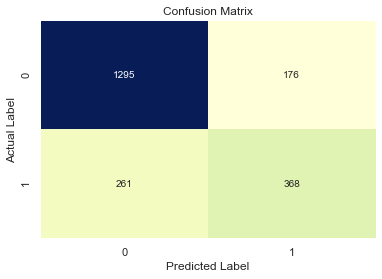

In [1078]:
tn, fp, fn, tp = metrics.confusion_matrix(train_labels,ytrain_predict_ann).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)
sns.heatmap(metrics.confusion_matrix(train_labels,ytrain_predict_ann),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()    

confusion_matrix for training data

In [1079]:
print(metrics.classification_report(train_labels,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1471
           1       0.68      0.59      0.63       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.79      0.79      0.79      2100



We can see a 79% accuracy on the Training data.

Now, let us check the Area Under Curve of the Receiver Operator Characteristic Curve.

AUC: 0.836


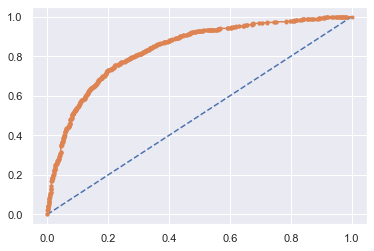

In [1080]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
ann_train_auc = metrics.roc_auc_score(train_labels,y_train_predict_prob_ann[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % ann_train_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = metrics.roc_curve(train_labels,y_train_predict_prob_ann[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr, marker='.')
# show the plot
plt.show()

In [1081]:
nn_metrics=classification_report(train_labels, ytrain_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
ann_train_precision=round(df.loc["1"][0],2)
ann_train_recall=round(df.loc["1"][1],2)
ann_train_f1=round(df.loc["1"][2],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)


ann_train_precision  0.68
ann_train_recall  0.59
ann_train_f1  0.63


Now, let us evaluate the predictions got on the test data using the same model evaluation metrics to understand how our model performs on the test data.

### Accuracy Test

In [1082]:
ann_test_score = best_grid_ann.score(X_test_scaled,test_labels)
ann_test_score

0.7733333333333333

### Confusion_matrix for test data

In [1083]:
ann_conf_test = metrics.confusion_matrix(test_labels, ytest_predict_ann)
ann_conf_test

array([[543,  62],
       [142, 153]], dtype=int64)

True Negative: 543 
False Positives: 62 
False Negatives: 142 
True Positives: 153 



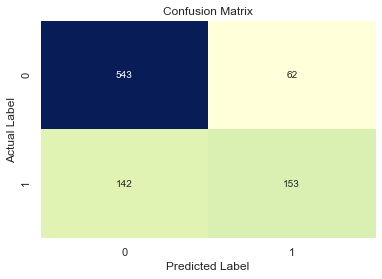

In [1084]:
tn, fp, fn, tp = metrics.confusion_matrix(test_labels,ytest_predict_ann).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')
sns.heatmap(metrics.confusion_matrix(test_labels,ytest_predict_ann),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [1085]:
print(metrics.classification_report(test_labels,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       605
           1       0.71      0.52      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



####  We can see a 77% overall accuracy on the Training data.

AUC: 0.815


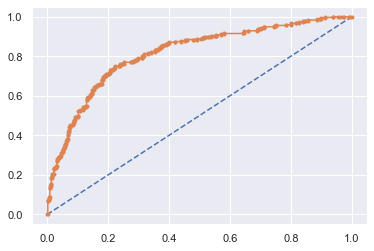

In [1086]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
ann_test_auc = metrics.roc_auc_score(test_labels,y_test_predict_prob_ann[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % ann_test_auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = metrics.roc_curve(test_labels,y_test_predict_prob_ann[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr, marker='.')
# show the plot
plt.show()

In [1087]:
nn_metrics=classification_report(test_labels, ytest_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
ann_test_precision=round(df.loc["1"][0],2)
ann_test_recall=round(df.loc["1"][1],2)
ann_test_f1=round(df.loc["1"][2],2)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)


ann_test_precision  0.71
ann_test_recall  0.52
ann_test_f1  0.6


Model Comparison

Comparing Accuracies from all the models for Train and Test Sets

In [1088]:
index=['Train-Accuracy','Test-Accuracy']
columns=['CART','RF','ANN']
train = [cart_train_score,rf_train_score,ann_train_score]
test = [cart_test_score,rf_test_score,ann_test_score]
#
data = pd.DataFrame([train,test],index=index,columns=columns)
round(data,3)

,CART,RF,ANN
Train-Accuracy,0.800,0.836,0.792
Test-Accuracy,0.776,0.778,0.773


## Comparing Confusion Matrices from All the models for the Train Set.

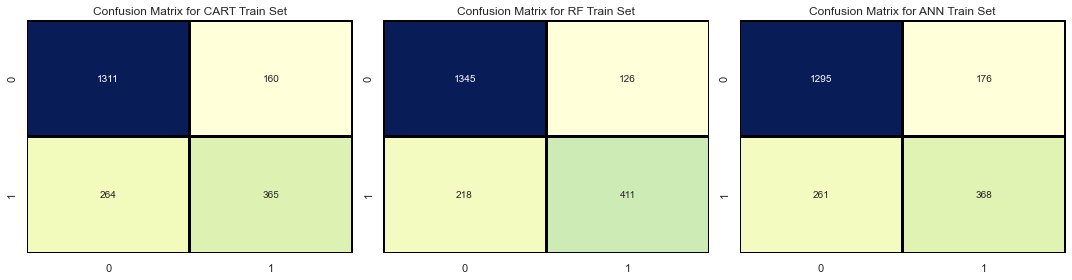

In [1089]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4))

ax1=sns.heatmap(cart_conf_train,annot=True, fmt='d', cbar=False,cmap='YlGnBu',linewidths=2, linecolor='black', ax=axes[0])
ax1.title.set_text('Confusion Matrix for CART Train Set')

ax2=sns.heatmap(rf_conf_train,annot=True, fmt='d',cmap='YlGnBu',linewidths=2, linecolor='black',cbar=False,ax=axes[1])
ax2.title.set_text('Confusion Matrix for RF Train Set')

ax3=sns.heatmap(ann_conf_train,annot=True, fmt='d', linewidths=2, linecolor='black',cbar=False,cmap='YlGnBu',ax=axes[2])
ax3.title.set_text('Confusion Matrix for ANN Train Set')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

### Comparing Confusion Matrices from All the models for the Test Set.

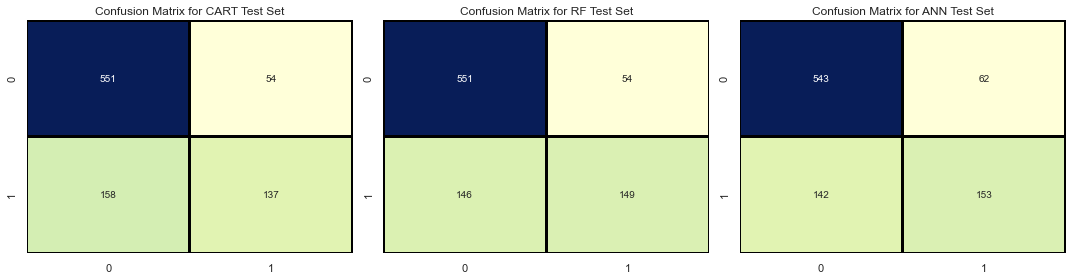

In [1090]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,4))

ax4=sns.heatmap(cart_conf_test,annot=True, fmt='d', cbar=False,cmap='YlGnBu',linewidths=2, linecolor='black', ax=axes[0])
ax4.title.set_text('Confusion Matrix for CART Test Set')

ax5=sns.heatmap(rf_conf_test,annot=True, fmt='d',cmap='YlGnBu',linewidths=2, linecolor='black',cbar=False,ax=axes[1])
ax5.title.set_text('Confusion Matrix for RF Test Set')

ax6=sns.heatmap(ann_conf_test,annot=True, fmt='d', linewidths=2, linecolor='black',cbar=False,cmap='YlGnBu',ax=axes[2])
ax6.title.set_text('Confusion Matrix for ANN Test Set')

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

### ROC Curve of all the models on the Training data

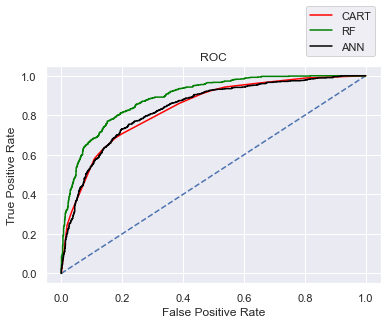

In [1091]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve of all the models on the Testing data

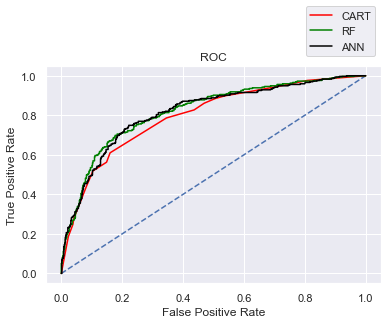

In [1092]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Comparison of the performance metrics of all the models.

In [1094]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_score,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_score,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_score,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_score,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[ann_train_score,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_score,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.78,0.84,0.78,0.79,0.77
AUC,0.83,0.80,0.89,0.82,0.84,0.82
Recall,0.58,0.46,0.65,0.51,0.59,0.52
Precision,0.70,0.72,0.77,0.73,0.68,0.71
F1 Score,0.63,0.56,0.70,0.60,0.63,0.60
